In [1]:
import tensorflow as tf  
from tensorflow.keras.datasets import mnist  
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  
from tensorflow.keras.optimizers import Adam  
import matplotlib.pyplot as plt  
  
# 加载数据  
(x_train, y_train), (x_test, y_test) = mnist.load_data()  
  
# 数据归一化  
x_train = x_train / 255.0  
x_test = x_test / 255.0  
  
# 标签进行one-hot编码  
y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)  
  
# 增加一个维度以匹配Keras的输入要求 (samples, 28, 28, 1)  
x_train = x_train.reshape(-1, 28, 28, 1)  
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
# 构建MLP模型  
mlp_model = Sequential([  
    Flatten(input_shape=(28, 28, 1)),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),  
    Dense(10, activation='softmax')  
])  
  
mlp_model.compile(optimizer=Adam(),  
                  loss='categorical_crossentropy',  
                  metrics=['accuracy'])  
  
# 训练MLP模型  
mlp_history = mlp_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/Users/gw/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8649 - loss: 0.4624 - val_accuracy: 0.9597 - val_loss: 0.1347
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9658 - loss: 0.1128 - val_accuracy: 0.9664 - val_loss: 0.1163
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9760 - loss: 0.0781 - val_accuracy: 0.9709 - val_loss: 0.0985
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9819 - loss: 0.0567 - val_accuracy: 0.9735 - val_loss: 0.0930
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9878 - loss: 0.0388 - val_accuracy: 0.9646 - val_loss: 0.1256
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9891 - loss: 0.0328 - val_accuracy: 0.9745 - val_loss: 0.0979
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0229 - val_accuracy: 0.9739 - val_loss: 0.1074
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9923 - loss: 0.0236 - 

In [3]:
# 构建CNN模型  
cnn_model = Sequential([  
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  
    MaxPooling2D(pool_size=(2, 2)),  
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  
    MaxPooling2D(pool_size=(2, 2)),  
    Flatten(),  
    Dense(128, activation='relu'),  
    Dense(10, activation='softmax')  
])  
  
cnn_model.compile(optimizer=Adam(),  
                  loss='categorical_crossentropy',  
                  metrics=['accuracy'])  
  
# 训练CNN模型  
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/Users/gw/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9056 - loss: 0.3131 - val_accuracy: 0.9817 - val_loss: 0.0616
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9856 - val_loss: 0.0478
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9915 - loss: 0.0273 - val_accuracy: 0.9870 - val_loss: 0.0419
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9925 - loss: 0.0214 - val_accuracy: 0.9869 - val_loss: 0.0444
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9955 - loss: 0.0147 - val_accuracy: 0.9887 - val_loss: 0.0497
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9962 - loss: 0.0115 - val_accuracy: 0.9902 - val_loss: 0.0372
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9969 - loss: 0.0089 - val_accuracy: 0.9879 - val_loss: 0.0451
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9979 - loss: 0

In [4]:
# 评估MLP模型  
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test, y_test)  
print(f"MLP Model - Test Loss: {mlp_test_loss}, Test Accuracy: {mlp_test_acc}")  
  
# 评估CNN模型  
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)  
print(f"CNN Model - Test Loss: {cnn_test_loss}, Test Accuracy: {cnn_test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9727 - loss: 0.1159
MLP Model - Test Loss: 0.09699489921331406, Test Accuracy: 0.9768000245094299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0469
CNN Model - Test Loss: 0.03666416183114052, Test Accuracy: 0.9926999807357788


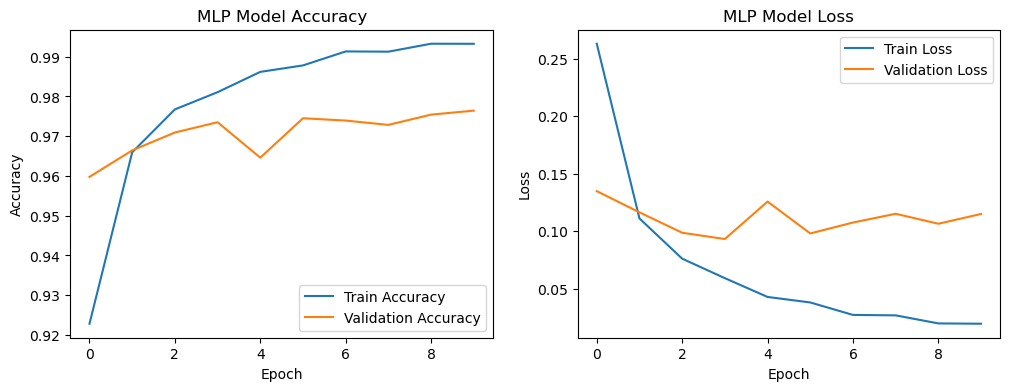

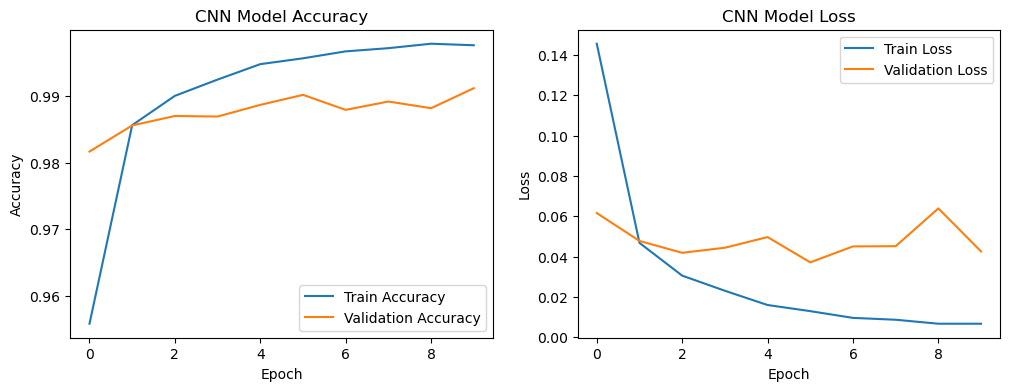

In [5]:
# 可视化MLP模型的训练过程  
plt.figure(figsize=(12, 4))  
plt.subplot(1, 2, 1)  
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')  
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')  
plt.title('MLP Model Accuracy')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy')  
plt.legend()  
  
plt.subplot(1, 2, 2)  
plt.plot(mlp_history.history['loss'], label='Train Loss')  
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')  
plt.title('MLP Model Loss')  
plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.legend()  
  
plt.show()  
  
# 可视化CNN模型的训练过程  
plt.figure(figsize=(12, 4))  
plt.subplot(1, 2, 1)  
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')  
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')  
plt.title('CNN Model Accuracy')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy')  
plt.legend()  
  
plt.subplot(1, 2, 2)  
plt.plot(cnn_history.history['loss'], label='Train Loss')  
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')  
plt.title('CNN Model Loss')  
plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.legend()  
  
plt.show()